In [0]:
import os
import codecs
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd drive/My\ Drive/北大x好域/

/content/drive/My Drive/北大x好域


In [0]:
ls

 20191209_Combined_Real_Fake_order.csv
 20191209_Combined_Real_Fake_order.gsheet
'2019.12.11 Combined_order_space_device.csv'
'2019.12.11 Combined_order_space_device _時間日期修正.csv'
'2019.12.11 Combined_order_space_device_時間日期格式化.csv'
'2019.12.12 Combined_order_space_device&timedate.csv'
'2019.12.16 combined_fake_real_order(final).csv'
 2019_12_20_time_online.csv
 2019_12_21_time_online_maybe_2.0.csv
 2019_12_21_time_online_maybe_2.0.xlsx
 2019_12_24_space_id_group_total_time.csv
 Code/
 locateid_accuracy.csv
 locateid_accuracy.gsheet
 orders.csv
 Original_Data/
 SAS_Data/
 spaceid_accuracy.csv
 spaces.csv
'space use rate.png'
'Working Process Record.gdoc'
'資料大小與準確率關係(locate_id).PNG'
'資料大小與準確率關係(space_id).PNG'


In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [0]:
import numpy as np
import pandas as pd
data = pd.read_csv("2019.12.16 combined_fake_real_order(final).csv",encoding = 'big5')
x = data.loc(axis = 1)[['space_id','locate_id', 'size', 'price_per_size','start_time_group','end_time_group','mrt', 'weekday', 'Is_holiday', 'status',' 0',' 1',' 2',' 3',' 4',' 5',' 6',' 7',' 8',' 9','10','11','12','13','14','15','16','17','18','19']]
print(len(x))
x

306688


,space_id,locate_id,size,price_per_size,start_time_group,end_time_group,mrt,weekday,Is_holiday,status,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,8,12,25.000000,1,1,台北車站,3,0,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,1,8,12,25.000000,2,3,台北車站,3,0,2,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,1,8,12,25.000000,4,4,台北車站,3,0,2,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,1,8,12,25.000000,1,1,台北車站,4,0,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,1,8,12,25.000000,2,2,台北車站,4,0,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306683,187,22,22,31.818182,4,4,南京復興站,7,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
306684,187,22,22,31.818182,1,1,南京復興站,1,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
306685,187,22,22,31.818182,2,2,南京復興站,1,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
306686,187,22,22,31.818182,3,3,南京復興站,1,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [0]:
x['status']-=1
y = x['status']
x

,locate_id,price_per_size,start_time_group,end_time_group,mrt,weekday,Is_holiday,status,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,8,25.000000,1,1,台北車站,3,0,0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,8,25.000000,2,3,台北車站,3,0,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,8,25.000000,4,4,台北車站,3,0,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,8,25.000000,1,1,台北車站,4,0,0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,8,25.000000,2,2,台北車站,4,0,0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306683,22,31.818182,4,4,南京復興站,7,1,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
306684,22,31.818182,1,1,南京復興站,1,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
306685,22,31.818182,2,2,南京復興站,1,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
306686,22,31.818182,3,3,南京復興站,1,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [0]:
x = x.drop('status', axis = 1)

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
x['locate_id'] = labelencoder.fit_transform(x['locate_id'])
x['price_per_size'] = labelencoder.fit_transform(x['price_per_size'])
x['start_time_group'] = labelencoder.fit_transform(x['start_time_group'])
x['end_time_group'] = labelencoder.fit_transform(x['end_time_group'])
x['mrt'] = labelencoder.fit_transform(x['mrt'])
x['weekday'] = labelencoder.fit_transform(x['weekday'])
x[' 0'] = labelencoder.fit_transform(x[' 0'])
x[' 1'] = labelencoder.fit_transform(x[' 1'])
x[' 2'] = labelencoder.fit_transform(x[' 2'])
x[' 3'] = labelencoder.fit_transform(x[' 3'])
x[' 4'] = labelencoder.fit_transform(x[' 4'])
x[' 5'] = labelencoder.fit_transform(x[' 5'])
x[' 6'] = labelencoder.fit_transform(x[' 6'])
x[' 7'] = labelencoder.fit_transform(x[' 7'])
x[' 8'] = labelencoder.fit_transform(x[' 8'])
x[' 9'] = labelencoder.fit_transform(x[' 9'])
x['10'] = labelencoder.fit_transform(x['10'])
x['11'] = labelencoder.fit_transform(x['11'])
x['12'] = labelencoder.fit_transform(x['12'])
x['13'] = labelencoder.fit_transform(x['13'])
x['14'] = labelencoder.fit_transform(x['14'])
x['15'] = labelencoder.fit_transform(x['15'])
x['16'] = labelencoder.fit_transform(x['16'])
x['17'] = labelencoder.fit_transform(x['17'])
x['18'] = labelencoder.fit_transform(x['18'])
x['19'] = labelencoder.fit_transform(x['19'])
x

,locate_id,price_per_size,start_time_group,end_time_group,mrt,weekday,Is_holiday,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,7,3,0,1,8,2,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0
1,7,3,1,3,8,2,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0
2,7,3,3,4,8,2,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0
3,7,3,0,1,8,3,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0
4,7,3,1,2,8,3,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306683,21,7,3,4,5,6,1,1,1,1,1,0,1,0,0,1,1,1,1,1,0,0,0,1,0,1,0
306684,21,7,0,1,5,0,0,1,1,1,1,0,1,0,0,1,1,1,1,1,0,0,0,1,0,1,0
306685,21,7,1,2,5,0,0,1,1,1,1,0,1,0,0,1,1,1,1,1,0,0,0,1,0,1,0
306686,21,7,2,3,5,0,0,1,1,1,1,0,1,0,0,1,1,1,1,1,0,0,0,1,0,1,0


In [0]:
from sklearn.model_selection import train_test_split

# X_train, X_temp, y_train, y_temp = train_test_split(x, y, 
#                                                     test_size=0.4, 
#                                                     random_state=0)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, 
#                                                     test_size=0.5, 
#                                                     random_state=0)
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                      test_size=0.2, 
                                                      random_state=0)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

model1 = LogisticRegression().fit(X_train, y_train)
print("no size and price")
print('train : ',model1.score(X_train,y_train))
print('test : ',model1.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


no size and price
train :  0.8046219686162625
test :  0.8043138022107014


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

model2 = LogisticRegression()
kfold = KFold(n_splits = 10)
scores = cross_val_score(model2, X_train, y_train, cv=kfold, scoring='accuracy')
# predictions = cross_val_predict(model1, X_train, y_train, cv=kfold)
print(scores.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

0.8047564703484819


In [0]:
x_noprice = data.loc(axis = 1)[['locate_id', 'size', 'price_per_size','start_time_group','end_time_group','mrt', 'weekday', 'Is_holiday', 'status',' 0',' 1',' 2',' 3',' 4',' 5',' 6',' 7',' 8',' 9','10','11','12','13','14','15','16','17','18','19']]
x_noprice['status']-=1
x_locate1 = x_noprice[x_noprice['locate_id'] == 25] #locate_id 22, 24, 31 are all fake orders
y_locate1 = x_locate1['status']
x_locate1 = x_locate1.drop('status', axis = 1)
x_locate1['locate_id'] = labelencoder.fit_transform(x_locate1['locate_id'])
x_locate1['size'] = labelencoder.fit_transform(x_locate1['size'])
x_locate1['price_per_size'] = labelencoder.fit_transform(x_locate1['price_per_size'])
x_locate1['start_time_group'] = labelencoder.fit_transform(x_locate1['start_time_group'])
x_locate1['end_time_group'] = labelencoder.fit_transform(x_locate1['end_time_group'])
x_locate1['mrt'] = labelencoder.fit_transform(x_locate1['mrt'])
x_locate1['weekday'] = labelencoder.fit_transform(x_locate1['weekday'])
x_locate1[' 0'] = labelencoder.fit_transform(x_locate1[' 0'])
x_locate1[' 1'] = labelencoder.fit_transform(x_locate1[' 1'])
x_locate1[' 2'] = labelencoder.fit_transform(x_locate1[' 2'])
x_locate1[' 3'] = labelencoder.fit_transform(x_locate1[' 3'])
x_locate1[' 4'] = labelencoder.fit_transform(x_locate1[' 4'])
x_locate1[' 5'] = labelencoder.fit_transform(x_locate1[' 5'])
x_locate1[' 6'] = labelencoder.fit_transform(x_locate1[' 6'])
x_locate1[' 7'] = labelencoder.fit_transform(x_locate1[' 7'])
x_locate1[' 8'] = labelencoder.fit_transform(x_locate1[' 8'])
x_locate1[' 9'] = labelencoder.fit_transform(x_locate1[' 9'])
x_locate1['10'] = labelencoder.fit_transform(x_locate1['10'])
x_locate1['11'] = labelencoder.fit_transform(x_locate1['11'])
x_locate1['12'] = labelencoder.fit_transform(x_locate1['12'])
x_locate1['13'] = labelencoder.fit_transform(x_locate1['13'])
x_locate1['14'] = labelencoder.fit_transform(x_locate1['14'])
x_locate1['15'] = labelencoder.fit_transform(x_locate1['15'])
x_locate1['16'] = labelencoder.fit_transform(x_locate1['16'])
x_locate1['17'] = labelencoder.fit_transform(x_locate1['17'])
x_locate1['18'] = labelencoder.fit_transform(x_locate1['18'])
x_locate1['19'] = labelencoder.fit_transform(x_locate1['19'])
X_train_locate1, X_test_locate1, y_train_locate1, y_test_locate1 = train_test_split(x_locate1, y_locate1, 
                                                                                    test_size=0.2, 
                                                                                    random_state=0)
model_locate1 = LogisticRegression().fit(X_train_locate1,  y_train_locate1)
print("locate 25")
print('train : ',model_locate1.score(X_train_locate1, y_train_locate1))
print('test : ',model_locate1.score(X_test_locate1,y_test_locate1))

locate 25
train :  0.8177766565758493
test :  0.8099562731247898


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
x_noprice = data.loc(axis = 1)[['locate_id', 'size', 'price_per_size','start_time_group','end_time_group','mrt', 'weekday', 'Is_holiday', 'status',' 0',' 1',' 2',' 3',' 4',' 5',' 6',' 7',' 8',' 9','10','11','12','13','14','15','16','17','18','19']]
x_noprice['status']-=1
y_noprice = x_noprice['status']
x_noprice = x_noprice.drop('status', axis = 1)
x_noprice['locate_id'] = labelencoder.fit_transform(x_noprice['locate_id'])
x_noprice['size'] = labelencoder.fit_transform(x_noprice['size'])
x_noprice['price_per_size'] = labelencoder.fit_transform(x_noprice['price_per_size'])
x_noprice['start_time_group'] = labelencoder.fit_transform(x_noprice['start_time_group'])
x_noprice['end_time_group'] = labelencoder.fit_transform(x_noprice['end_time_group'])
x_noprice['mrt'] = labelencoder.fit_transform(x_noprice['mrt'])
x_noprice['weekday'] = labelencoder.fit_transform(x_noprice['weekday'])
x_noprice[' 0'] = labelencoder.fit_transform(x_noprice[' 0'])
x_noprice[' 1'] = labelencoder.fit_transform(x_noprice[' 1'])
x_noprice[' 2'] = labelencoder.fit_transform(x_noprice[' 2'])
x_noprice[' 3'] = labelencoder.fit_transform(x_noprice[' 3'])
x_noprice[' 4'] = labelencoder.fit_transform(x_noprice[' 4'])
x_noprice[' 5'] = labelencoder.fit_transform(x_noprice[' 5'])
x_noprice[' 6'] = labelencoder.fit_transform(x_noprice[' 6'])
x_noprice[' 7'] = labelencoder.fit_transform(x_noprice[' 7'])
x_noprice[' 8'] = labelencoder.fit_transform(x_noprice[' 8'])
x_noprice[' 9'] = labelencoder.fit_transform(x_noprice[' 9'])
x_noprice['10'] = labelencoder.fit_transform(x_noprice['10'])
x_noprice['11'] = labelencoder.fit_transform(x_noprice['11'])
x_noprice['12'] = labelencoder.fit_transform(x_noprice['12'])
x_noprice['13'] = labelencoder.fit_transform(x_noprice['13'])
x_noprice['14'] = labelencoder.fit_transform(x_noprice['14'])
x_noprice['15'] = labelencoder.fit_transform(x_noprice['15'])
x_noprice['16'] = labelencoder.fit_transform(x_noprice['16'])
x_noprice['17'] = labelencoder.fit_transform(x_noprice['17'])
x_noprice['18'] = labelencoder.fit_transform(x_noprice['18'])
x_noprice['19'] = labelencoder.fit_transform(x_noprice['19'])
X_train_noprice, X_test_noprice, y_train_noprice, y_test_noprice = train_test_split(x_noprice, y_noprice, 
                                                                                    test_size=0.2, 
                                                                                    random_state=0)
model_noprice = LogisticRegression().fit(X_train_noprice, y_train_noprice)
print("no price")
print('train : ',model_noprice.score(X_train_noprice, y_train_noprice))
print('test : ',model_noprice.score(X_test_noprice,y_test_noprice))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


no price
train :  0.8112696148359486
test :  0.8116502005282207


In [0]:
x_nosize = data.loc(axis = 1)[['locate_id', 'price', 'price_per_size','start_time_group','end_time_group','mrt', 'weekday', 'Is_holiday', 'status',' 0',' 1',' 2',' 3',' 4',' 5',' 6',' 7',' 8',' 9','10','11','12','13','14','15','16','17','18','19']]
x_nosize['status']-=1
y_nosize = x_nosize['status']
x_nosize = x_nosize.drop('status', axis = 1)
x_nosize['locate_id'] = labelencoder.fit_transform(x_nosize['locate_id'])
x_nosize['price'] = labelencoder.fit_transform(x_nosize['price'])
x_nosize['price_per_size'] = labelencoder.fit_transform(x_nosize['price_per_size'])
x_nosize['start_time_group'] = labelencoder.fit_transform(x_nosize['start_time_group'])
x_nosize['end_time_group'] = labelencoder.fit_transform(x_nosize['end_time_group'])
x_nosize['mrt'] = labelencoder.fit_transform(x_nosize['mrt'])
x_nosize['weekday'] = labelencoder.fit_transform(x_nosize['weekday'])
x_nosize[' 0'] = labelencoder.fit_transform(x_nosize[' 0'])
x_nosize[' 1'] = labelencoder.fit_transform(x_nosize[' 1'])
x_nosize[' 2'] = labelencoder.fit_transform(x_nosize[' 2'])
x_nosize[' 3'] = labelencoder.fit_transform(x_nosize[' 3'])
x_nosize[' 4'] = labelencoder.fit_transform(x_nosize[' 4'])
x_nosize[' 5'] = labelencoder.fit_transform(x_nosize[' 5'])
x_nosize[' 6'] = labelencoder.fit_transform(x_nosize[' 6'])
x_nosize[' 7'] = labelencoder.fit_transform(x_nosize[' 7'])
x_nosize[' 8'] = labelencoder.fit_transform(x_nosize[' 8'])
x_nosize[' 9'] = labelencoder.fit_transform(x_nosize[' 9'])
x_nosize['10'] = labelencoder.fit_transform(x_nosize['10'])
x_nosize['11'] = labelencoder.fit_transform(x_nosize['11'])
x_nosize['12'] = labelencoder.fit_transform(x_nosize['12'])
x_nosize['13'] = labelencoder.fit_transform(x_nosize['13'])
x_nosize['14'] = labelencoder.fit_transform(x_nosize['14'])
x_nosize['15'] = labelencoder.fit_transform(x_nosize['15'])
x_nosize['16'] = labelencoder.fit_transform(x_nosize['16'])
x_nosize['17'] = labelencoder.fit_transform(x_nosize['17'])
x_nosize['18'] = labelencoder.fit_transform(x_nosize['18'])
x_nosize['19'] = labelencoder.fit_transform(x_nosize['19'])
X_train_nosize, X_test_nosize, y_train_nosize, y_test_nosize = train_test_split(x_nosize, y_nosize, 
                                                                                    test_size=0.2, 
                                                                                    random_state=0)
model_nosize = LogisticRegression().fit(X_train_nosize, y_train_nosize)
print("no size")
print('train : ',model_nosize.score(X_train_nosize, y_train_nosize))
print('test : ',model_nosize.score(X_test_nosize,y_test_nosize))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


no size
train :  0.8075932341552884
test :  0.8071505428934755


In [0]:
x_all = data.loc(axis = 1)[['locate_id', 'price', 'size', 'price_per_size','start_time_group','end_time_group','mrt', 'weekday', 'Is_holiday', 'status',' 0',' 1',' 2',' 3',' 4',' 5',' 6',' 7',' 8',' 9','10','11','12','13','14','15','16','17','18','19']]
x_all['status']-=1
y_all = x_all['status']
x_all = x_all.drop('status', axis = 1)
x_all['locate_id'] = labelencoder.fit_transform(x_all['locate_id'])
x_all['price'] = labelencoder.fit_transform(x_all['price'])
x_all['size'] = labelencoder.fit_transform(x_all['size'])
x_all['price_per_size'] = labelencoder.fit_transform(x_all['price_per_size'])
x_all['start_time_group'] = labelencoder.fit_transform(x_all['start_time_group'])
x_all['end_time_group'] = labelencoder.fit_transform(x_all['end_time_group'])
x_all['mrt'] = labelencoder.fit_transform(x_all['mrt'])
x_all['weekday'] = labelencoder.fit_transform(x_all['weekday'])
x_all[' 0'] = labelencoder.fit_transform(x_all[' 0'])
x_all[' 1'] = labelencoder.fit_transform(x_all[' 1'])
x_all[' 2'] = labelencoder.fit_transform(x_all[' 2'])
x_all[' 3'] = labelencoder.fit_transform(x_all[' 3'])
x_all[' 4'] = labelencoder.fit_transform(x_all[' 4'])
x_all[' 5'] = labelencoder.fit_transform(x_all[' 5'])
x_all[' 6'] = labelencoder.fit_transform(x_all[' 6'])
x_all[' 7'] = labelencoder.fit_transform(x_all[' 7'])
x_all[' 8'] = labelencoder.fit_transform(x_all[' 8'])
x_all[' 9'] = labelencoder.fit_transform(x_all[' 9'])
x_all['10'] = labelencoder.fit_transform(x_all['10'])
x_all['11'] = labelencoder.fit_transform(x_all['11'])
x_all['12'] = labelencoder.fit_transform(x_all['12'])
x_all['13'] = labelencoder.fit_transform(x_all['13'])
x_all['14'] = labelencoder.fit_transform(x_all['14'])
x_all['15'] = labelencoder.fit_transform(x_all['15'])
x_all['16'] = labelencoder.fit_transform(x_all['16'])
x_all['17'] = labelencoder.fit_transform(x_all['17'])
x_all['18'] = labelencoder.fit_transform(x_all['18'])
x_all['19'] = labelencoder.fit_transform(x_all['19'])
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(x_all, y_all, 
                                                                                    test_size=0.2, 
                                                                                    random_state=0)
model_all = LogisticRegression().fit(X_train_all, y_train_all)
print("size and price")
print('train : ',model_all.score(X_train_all, y_train_all))
print('test : ',model_all.score(X_test_all,y_test_all))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


size and price
train :  0.8093173018137355
test :  0.8101177084352278


In [0]:
x_nopricenosize = data.loc(axis = 1)[['locate_id','start_time_group','end_time_group','mrt', 'weekday', 'Is_holiday', 'status',' 0',' 1',' 2',' 3',' 4',' 5',' 6',' 7',' 8',' 9','10','11','12','13','14','15','16','17','18','19']]
x_nopricenosize['status']-=1
y_nopricenosize = x_nopricenosize['status']
x_nopricenosize = x_nopricenosize.drop('status', axis = 1)
x_nopricenosize['locate_id'] = labelencoder.fit_transform(x_nopricenosize['locate_id'])
x_nopricenosize['start_time_group'] = labelencoder.fit_transform(x_nopricenosize['start_time_group'])
x_nopricenosize['end_time_group'] = labelencoder.fit_transform(x_nopricenosize['end_time_group'])
x_nopricenosize['mrt'] = labelencoder.fit_transform(x_nopricenosize['mrt'])
x_nopricenosize['weekday'] = labelencoder.fit_transform(x_nopricenosize['weekday'])
x_nopricenosize[' 0'] = labelencoder.fit_transform(x_nopricenosize[' 0'])
x_nopricenosize[' 1'] = labelencoder.fit_transform(x_nopricenosize[' 1'])
x_nopricenosize[' 2'] = labelencoder.fit_transform(x_nopricenosize[' 2'])
x_nopricenosize[' 3'] = labelencoder.fit_transform(x_nopricenosize[' 3'])
x_nopricenosize[' 4'] = labelencoder.fit_transform(x_nopricenosize[' 4'])
x_nopricenosize[' 5'] = labelencoder.fit_transform(x_nopricenosize[' 5'])
x_nopricenosize[' 6'] = labelencoder.fit_transform(x_nopricenosize[' 6'])
x_nopricenosize[' 7'] = labelencoder.fit_transform(x_nopricenosize[' 7'])
x_nopricenosize[' 8'] = labelencoder.fit_transform(x_nopricenosize[' 8'])
x_nopricenosize[' 9'] = labelencoder.fit_transform(x_nopricenosize[' 9'])
x_nopricenosize['10'] = labelencoder.fit_transform(x_nopricenosize['10'])
x_nopricenosize['11'] = labelencoder.fit_transform(x_nopricenosize['11'])
x_nopricenosize['12'] = labelencoder.fit_transform(x_nopricenosize['12'])
x_nopricenosize['13'] = labelencoder.fit_transform(x_nopricenosize['13'])
x_nopricenosize['14'] = labelencoder.fit_transform(x_nopricenosize['14'])
x_nopricenosize['15'] = labelencoder.fit_transform(x_nopricenosize['15'])
x_nopricenosize['16'] = labelencoder.fit_transform(x_nopricenosize['16'])
x_nopricenosize['17'] = labelencoder.fit_transform(x_nopricenosize['17'])
x_nopricenosize['18'] = labelencoder.fit_transform(x_nopricenosize['18'])
x_nopricenosize['19'] = labelencoder.fit_transform(x_nopricenosize['19'])
X_train_nopricenosize, X_test_nopricenosize, y_train_nopricenosize, y_test_nopricenosize = train_test_split(x_nopricenosize, y_nopricenosize, 
                                                                                    test_size=0.2, 
                                                                                    random_state=0)
model_nopricenosize = LogisticRegression().fit(X_train_nopricenosize, y_train_nopricenosize)
print("no price no size")
print('train : ',model_nopricenosize.score(X_train_nopricenosize, y_train_nopricenosize))
print('test : ',model_nopricenosize.score(X_test_nopricenosize,y_test_nopricenosize))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


no price no size
train :  0.8063093539841043
test :  0.805520232156249


In [0]:
test = np.array([[7,12,300,25,10,16,0,1,8,2,0]])
model1.predict_proba(test)

ValueError: ignored

In [0]:
model1.predict(test)

array([0])

In [0]:
data = pd.read_csv("2019.12.16 combined_fake_real_order(final).csv",encoding = 'big5')
x_locate = data.loc(axis = 1)[['locate_id','size', 'price_per_size','start_time_group','end_time_group','mrt', 'weekday', 'Is_holiday', 'status',' 0',' 1',' 2',' 3',' 4',' 5',' 6',' 7',' 8',' 9','10','11','12','13','14','15','16','17','18','19']]
x_locate['status']-=1
labelencoder = LabelEncoder()
x_locate['start_time_group'] = labelencoder.fit_transform(x_locate['start_time_group'])
x_locate['end_time_group'] = labelencoder.fit_transform(x_locate['end_time_group'])
x_locate['mrt'] = labelencoder.fit_transform(x_locate['mrt'])
x_locate['weekday'] = labelencoder.fit_transform(x_locate['weekday'])
x_locate[' 0'] = labelencoder.fit_transform(x_locate[' 0'])
x_locate[' 1'] = labelencoder.fit_transform(x_locate[' 1'])
x_locate[' 2'] = labelencoder.fit_transform(x_locate[' 2'])
x_locate[' 3'] = labelencoder.fit_transform(x_locate[' 3'])
x_locate[' 4'] = labelencoder.fit_transform(x_locate[' 4'])
x_locate[' 5'] = labelencoder.fit_transform(x_locate[' 5'])
x_locate[' 6'] = labelencoder.fit_transform(x_locate[' 6'])
x_locate[' 7'] = labelencoder.fit_transform(x_locate[' 7'])
x_locate[' 8'] = labelencoder.fit_transform(x_locate[' 8'])
x_locate[' 9'] = labelencoder.fit_transform(x_locate[' 9'])
x_locate['10'] = labelencoder.fit_transform(x_locate['10'])
x_locate['11'] = labelencoder.fit_transform(x_locate['11'])
x_locate['12'] = labelencoder.fit_transform(x_locate['12'])
x_locate['13'] = labelencoder.fit_transform(x_locate['13'])
x_locate['14'] = labelencoder.fit_transform(x_locate['14'])
x_locate['15'] = labelencoder.fit_transform(x_locate['15'])
x_locate['16'] = labelencoder.fit_transform(x_locate['16'])
x_locate['17'] = labelencoder.fit_transform(x_locate['17'])
x_locate['18'] = labelencoder.fit_transform(x_locate['18'])
x_locate['19'] = labelencoder.fit_transform(x_locate['19'])

skip = [22,24,31]
no = []
acc = []
acc_train = []
data_size = []
dis = []

for i in range(1,33):
  if i in skip:
    continue
  else:
    x_new = x_locate[x_locate["locate_id"] == i]
    y_new = x_new['status']
    x_new = x_new.drop('status', axis = 1)
    x_new = x_new.drop('locate_id', axis = 1)
    X_train_locate, X_test_locate, y_train_locate, y_test_locate = train_test_split(x_new, y_new, 
                                                                                    test_size=0.2, 
                                                                                    random_state=0)
    model_locate = LogisticRegression().fit(X_train_locate, y_train_locate)
    no.append(i)
    acc_train.append(model_locate.score(X_train_locate,y_train_locate))
    acc.append(model_locate.score(X_test_locate,y_test_locate))
    data_size.append(len(x_new))
    dis.append(model_locate.score(X_test_locate,y_test_locate) - model_locate.score(X_train_locate,y_train_locate))
for i in range(len(acc)):
  print('Locate ID : ', no[i] ,'訓練集準確率：',acc_train[i],'，測試集準確率 : ' , acc[i],'準確率相差：', dis[i],'，資料大小 : ' , data_size[i])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Locate ID :  1 訓練集準確率： 0.7875087229588277 ，測試集準確率 :  0.8131101813110181 準確率相差： 0.02560145835219041 ，資料大小 :  3583
Locate ID :  2 訓練集準確率： 0.889545573942737 ，測試集準確率 :  0.8776260504201681 準確率相差： -0.011919523522568976 ，資料大小 :  9518
Locate ID :  3 訓練集準確率： 0.8048336368150968 ，測試集準確率 :  0.7961614824619457 準確率相差： -0.008672154353151051 ，資料大小 :  7552
Locate ID :  4 訓練集準確率： 0.6377473363774734 ，測試集準確率 :  0.6303030303030303 準確率相差： -0.00744430607444313 ，資料大小 :  822
Locate ID :  5 訓練集準確率： 0.9517003850951891 ，測試集準確率 :  0.951296236034277 準確率相差： -0.00040414906091201797 ，資料大小 :  46093
Locate ID :  6 訓練集準確率： 0.8903706815079282 ，測試集準確率 :  0.880302393952121 準確率相差： -0.010068287555807243 ，資料大小 :  11904
Locate ID :  7 訓練集準確率： 0.7913829047949965 ，測試集準確率 :  0.7882156753752084 準確率相差： -0.003167229419788087 ，資料大小 :  8994
Locate ID :  8 訓練集準確率： 0.871244635193133 ，測試集準確率 :  0.8736289938006676 準確率相差： 0.002384358607534609 ，資料大小 :  10485
Locate ID :  9 訓練集準確率： 0.7918956043956044 ，測試集準確率 :  0.7927247769389156 準確率相差： 0.000

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
data = pd.read_csv("2019.12.16 combined_fake_real_order(final).csv",encoding = 'big5')
x_space = data.loc(axis = 1)[['space_id','size', 'price_per_size','start_time_group','end_time_group','mrt', 'weekday', 'Is_holiday', 'status',' 0',' 1',' 2',' 3',' 4',' 5',' 6',' 7',' 8',' 9','10','11','12','13','14','15','16','17','18','19']]
x_space['status']-=1
labelencoder = LabelEncoder()
x_space['size'] = labelencoder.fit_transform(x_space['size'])
x_space['price_per_size'] = labelencoder.fit_transform(x_space['price_per_size'])
x_space['start_time_group'] = labelencoder.fit_transform(x_space['start_time_group'])
x_space['end_time_group'] = labelencoder.fit_transform(x_space['end_time_group'])
x_space['mrt'] = labelencoder.fit_transform(x_space['mrt'])
x_space['weekday'] = labelencoder.fit_transform(x_space['weekday'])
x_space[' 0'] = labelencoder.fit_transform(x_space[' 0'])
x_space[' 1'] = labelencoder.fit_transform(x_space[' 1'])
x_space[' 2'] = labelencoder.fit_transform(x_space[' 2'])
x_space[' 3'] = labelencoder.fit_transform(x_space[' 3'])
x_space[' 4'] = labelencoder.fit_transform(x_space[' 4'])
x_space[' 5'] = labelencoder.fit_transform(x_space[' 5'])
x_space[' 6'] = labelencoder.fit_transform(x_space[' 6'])
x_space[' 7'] = labelencoder.fit_transform(x_space[' 7'])
x_space[' 8'] = labelencoder.fit_transform(x_space[' 8'])
x_space[' 9'] = labelencoder.fit_transform(x_space[' 9'])
x_space['10'] = labelencoder.fit_transform(x_space['10'])
x_space['11'] = labelencoder.fit_transform(x_space['11'])
x_space['12'] = labelencoder.fit_transform(x_space['12'])
x_space['13'] = labelencoder.fit_transform(x_space['13'])
x_space['14'] = labelencoder.fit_transform(x_space['14'])
x_space['15'] = labelencoder.fit_transform(x_space['15'])
x_space['16'] = labelencoder.fit_transform(x_space['16'])
x_space['17'] = labelencoder.fit_transform(x_space['17'])
x_space['18'] = labelencoder.fit_transform(x_space['18'])
x_space['19'] = labelencoder.fit_transform(x_space['19'])

skip2 = [2,26,27,28,29,30,32,33,34,35,36,37,38,39,40,42,43,44,45,46,47,48,49,50,52,53,54,55,56,57,58,59,60,61,103,106,107,108,109,120,167,171,174,183,185,186,187,188,189,190,191]
no2 = []
acc2 = []
data_size2 = []

for i in range(1,187):
  if i in skip2:
    continue
  else:
    x_new = x_space[x_space["space_id"] == i]
    y_new = x_new['status']
    x_new = x_new.drop('status', axis = 1)
    x_new = x_new.drop('space_id', axis = 1)
    X_train_space, X_test_space, y_train_space, y_test_space = train_test_split(x_new, y_new, 
                                                                                    test_size=0.2, 
                                                                                    random_state=0)
    model_space = LogisticRegression().fit(X_train_space, y_train_space)
    no2.append(i)
    acc2.append(model_space.score(X_test_space,y_test_space))
    data_size2.append(len(x_new))
for i in range(len(acc2)):
  print('Space ID : ', no2[i] ,'，準確率 : ' , acc2[i],'，資料大小 : ' , data_size2[i])
print(len(no2))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Space ID :  1 ，準確率 :  0.9239543726235742 ，資料大小 :  3944
Space ID :  3 ，準確率 :  0.8131101813110181 ，資料大小 :  3583
Space ID :  4 ，準確率 :  0.9102040816326531 ，資料大小 :  3675
Space ID :  5 ，準確率 :  0.9171195652173914 ，資料大小 :  3678
Space ID :  6 ，準確率 :  0.7550471063257066 ，資料大小 :  3713
Space ID :  7 ，準確率 :  0.7469879518072289 ，資料大小 :  3732
Space ID :  8 ，準確率 :  0.781718963165075 ，資料大小 :  3661
Space ID :  9 ，準確率 :  0.7818181818181819 ，資料大小 :  3850
Space ID :  10 ，準確率 :  0.7691275167785235 ，資料大小 :  3722
Space ID :  11 ，準確率 :  0.8222811671087533 ，資料大小 :  3766
Space ID :  12 ，準確率 :  0.8732590529247911 ，資料大小 :  3589
Space ID :  13 ，準確率 :  0.9796954314720813 ，資料大小 :  2952
Space ID :  14 ，準確率 :  0.9691780821917808 ，資料大小 :  2919
Space ID :  15 ，準確率 :  0.8953846153846153 ，資料大小 :  3248
Space ID :  16 ，準確率 :  0.7852852852852853 ，資料大小 :  3328
Space ID :  17 ，準確率 :  0.8720379146919431 ，資料大小 :  3163
Space ID :  18 ，準確率 :  0.8772455089820359 ，資料大小 :  3339
Space ID :  19 ，準確率 :  0.8059006211180124 ，資料大小 :  3218
S

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

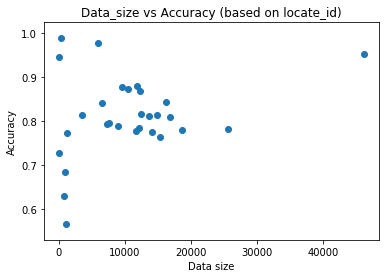

In [0]:
import matplotlib.pyplot as plt

plt.scatter(data_size,acc)
plt.title('Data_size vs Accuracy (based on locate_id)')
plt.xlabel("Data size")
plt.ylabel("Accuracy")
plt.draw()

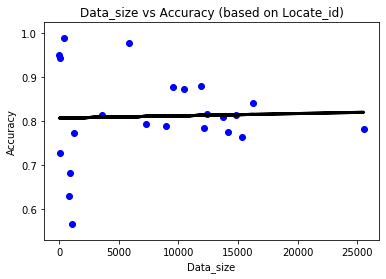

In [0]:
from collections import OrderedDict
import pandas as pd
from sklearn.linear_model import LinearRegression
# import math

# data_size[4] = math.log(data_size[4])
             
table3 = {'data_size' : data_size, 'accuracy' : acc}
table4 = {'data_size' : data_size2, 'accuracy' : acc2}
data1 = DataFrame(table3)
data2 = DataFrame(table4)
data1_X=data1.loc[:,'data_size']
data1_y=data1.loc[:,'accuracy']
X_train , X_test , y_train , y_test = train_test_split(data1_X ,data1_y ,
                                                        test_size=0.2, 
                                                        random_state=0)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
model = LinearRegression()
model.fit(X_train , y_train)
plt.scatter(X_train, y_train, color='blue', label="train data")
y_train_pred = model.predict(X_train)
plt.plot(X_train, y_train_pred, color='black', linewidth=3, label="best line")
plt.xlabel("Data_size")
plt.ylabel("Accuracy")
plt.title('Data_size vs Accuracy (based on Locate_id)')
plt.show()

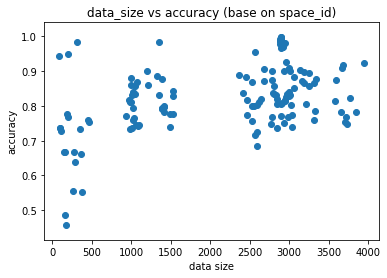

In [0]:
import matplotlib.pyplot as plt

plt.scatter(data_size2,acc2)
plt.title('data_size vs accuracy (base on space_id)')
plt.xlabel("data size")
plt.ylabel("accuracy")
plt.draw()

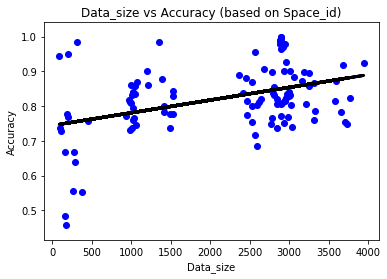

In [0]:
from collections import OrderedDict
import pandas as pd
from sklearn.linear_model import LinearRegression
             
table3 = {'data_size' : data_size, 'accuracy' : acc}
table4 = {'data_size' : data_size2, 'accuracy' : acc2}
data1 = DataFrame(table3)
data2 = DataFrame(table4)
data2_X=data2.loc[:,'data_size']
data2_y=data2.loc[:,'accuracy']
X_train , X_test , y_train , y_test = train_test_split(data2_X ,data2_y ,
                                                        test_size=0.2, 
                                                        random_state=0)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
model = LinearRegression()
model.fit(X_train , y_train)
plt.scatter(X_train, y_train, color='blue', label="train data")
y_train_pred = model.predict(X_train)
plt.plot(X_train, y_train_pred, color='black', linewidth=3, label="best line")
plt.xlabel("Data_size")
plt.ylabel("Accuracy")
plt.title('Data_size vs Accuracy (based on Space_id)')
plt.show()

In [0]:
import csv
from pandas.core.frame import DataFrame
table1 = {'locate_id' : no, 'data size' : data_size,'train set accuracy' : acc_train,'test set accuracy' : acc ,'distance' : dis}
# table2 = {'space_id' : no2, 'accuracy' : acc2}
data1 = DataFrame(table1)
# data2 = DataFrame(table2)
data1.to_csv('locateid_accuracy.csv')
# data2.to_csv('spaceid_accuracy.csv')